In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np

import mplhep as hep
plt.style.use(hep.style.CMS)

In [14]:
""" This function is used to plot the efficiency in function of HVeff 

The argument file is a list with csv files for each ABS (rates) with the following columns: 

For each csv file one should include a legend for the rates/abs.

How you call the function:

file = ['data_RE1_1_004662.csv']  -> List with the csv files containing the data
legend = [r'$xx Hz/cm^2$']        -> Legend for each csv file
chamber_hv = 'hveff_RE1_1_001-TN' -> Name of the column containing the voltages (inside the csv file). Normally the name is hveff_ + chamber + gap

plot_eff(file, legend)

"""

def plot_eff(file, legend, chamber_hv):
    
    # List to pass the efficiency for each csv
    eff_list = []
    # List to pass the efficiency error for each csv
    eff_error_list = []
    voltage_list = []
    
    for f in file:
        # Read the csv file as a panda dataframe
        df = pd.read_csv(f)
        # Takes the effective voltage
        voltage = df[chamber_hv].astype(float)
        # Takes the efficiency     
        efficiency = df['efficiencyMuon']
        efficiency_error = df['efficiencyMuon_err']
        # Insert the desired values on the lists
        eff_list.append(efficiency)
        eff_error_list.append(efficiency_error)
        voltage_list.append(voltage)
        
    # Figure and axis
    fig, ax = plt.subplots()
    # Attributes xaxis and yaxis
    
    # Loop used for plot the data for each csv file
    for (ef, er, vo, leg) in zip(eff_list, eff_error_list, voltage_list, legend):
        #ax.plot(vo, ef, marker='s', linestyle=None, linewidth=0)
        plt.errorbar(vo, ef, yerr=er, marker='*', linestyle='', label=leg), #marker='.', linestyle=None, linewidth=0)
        ax.legend()

    # Xlabel
    ax.xaxis.set_label_coords(0.5, -0.055)
    ax.set_xlabel(r'$HV_{eff} (V)$', fontsize = 22)

    # Ylabel
    ax.yaxis.set_label_coords(-0.09, 0.86)
    ax.set_ylabel(r'Efficiency', fontsize = 22)
    #plt.legend('labels')

    # CMS format
    hfont = {'fontname':'Helvetica'}    
    plt.text(0.17, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure) # Value for on top: 0.17, 0.89, inside plot: 0.17, 0.80
    plt.text(0.27, 0.89, "Preliminary", fontdict=hfont, style='italic',fontsize = 22, transform=plt.gcf().transFigure) # Value for on top: 0.27, 0.89, inside plot: 0.27, 0.80


    ### If ones would like to move the scientific notation
    #t = ax.yaxis.get_offset_text()
    #t.set_x(0.008)

    plt.grid()

In [5]:
######################## TO BE UPDATED ########################

""" This function is used to plot the corrected efficiency by using the voltage on gas drop
OBS: This is a specific macro that is used for a DOUBLE GAP chamber (in this case, Kodel C)

The argument file is a list with csv files for each ABS with the following columns: 
Voltage, Efficiency, Eficiency error, Ibot(uA), Itop(uA), Resistance(ohms)

For each csv file one should include a legend.

How you call the function:

file = ['source_off.csv', 'abs460.csv']
legend = ['Source OFF', 'ABS 460']
plot_eff_corr(file, legend)

"""

def plot_eff_corr(file, legend):
    
    # List to pass the efficiency for each csv
    eff_list = []
    # List to pass the efficiency error for each csv
    eff_error_list = []
    # List to pass the corrected voltage for each csv
    correct_volt_list = []
    
    for f in file:
        # Read the csv file as a panda dataframe
        df = pd.read_csv(f)
        # Takes the effective voltage
        voltage = df['Voltage(V)'].astype(float)
        # Takes the resistance
        resistence_bot = df['Resistance_bot(ohm)'].astype(float) # In ohms
        resistence_top = df['Resistance_top(ohm)'].astype(float) # In ohms
        # Takes the currents
        Ibot = df['Ibot(uA)'].astype(float) * 1e-6 # In Amperes
        Itop = df['Itop(uA)'].astype(float) * 1e-6 # In Amperes
        # Computes the voltage on the gas
        corrected_voltage = voltage - resistence_bot * Ibot - resistence_top *Itop
        # Takes the efficiency and its error
        efficiency = df['Efficiency']
        efficiency_error = df['Eff_error']
        # Insert the desired values on the lists
        eff_list.append(efficiency)
        eff_error_list.append(efficiency_error)
        correct_volt_list.append(corrected_voltage)
        
    # Figure and axis
    fig, ax = plt.subplots()
    # Attributes xaxis and yaxis
    
    # Loop used for plot the data for each csv file
    for (ef, er, vo, leg) in zip(eff_list, eff_error_list , correct_volt_list, legend):
        #ax.plot(vo, ef, marker='s', linestyle=None, linewidth=0)
        plt.errorbar(vo, ef, yerr=er, marker='*', linestyle='', label=leg), #marker='.', linestyle=None, linewidth=0)
        ax.legend()

    # Xlabel
    ax.xaxis.set_label_coords(0.5, -0.055)
    ax.set_xlabel(r'$HV_{gas} (V)$', fontsize = 22)

    # Ylabel
    ax.yaxis.set_label_coords(-0.09, 0.86)
    ax.set_ylabel(r'Efficiency', fontsize = 22)
    #plt.legend('labels')

    # CMS format
    hfont = {'fontname':'Helvetica'}    
    plt.text(0.17, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure) # Value for on top: 0.17, 0.89, inside plot: 0.17, 0.80
    plt.text(0.27, 0.89, "Preliminary", fontdict=hfont, style='italic',fontsize = 22, transform=plt.gcf().transFigure) # Value for on top: 0.27, 0.89, inside plot: 0.27, 0.80


    ### If ones would like to move the scientific notation
    #t = ax.yaxis.get_offset_text()
    #t.set_x(0.008)

    plt.grid()

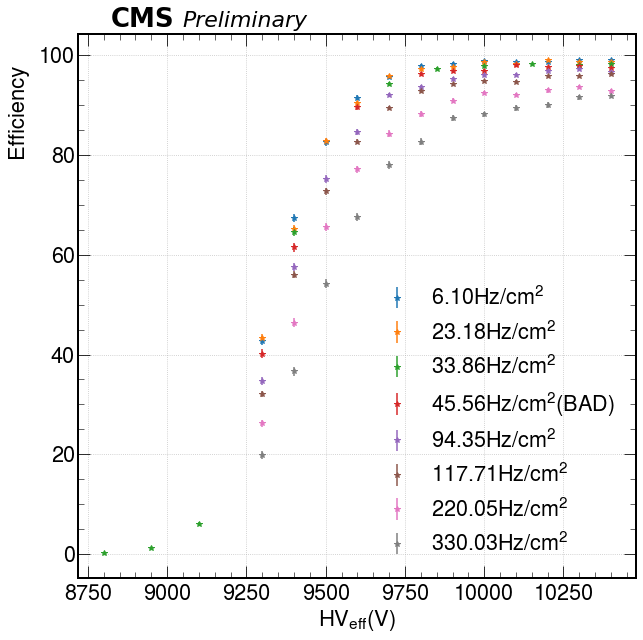

In [17]:
## Standard gas for RE1_1
file = ['data_RE1_1_004662.csv', 'data_RE1_1_004659.csv', 'data_RE1_1_004665.csv',
        'data_RE1_1_004656.csv', 'data_RE1_1_004658.csv', 'data_RE1_1_004655.csv',
        'data_RE1_1_004661.csv', 'data_RE1_1_004663.csv']
legend = [r'$6.10 Hz/cm^2$', r'$23.18 Hz/cm^2$', r'$33.86 Hz/cm^2$', r'$45.56 Hz/cm^2(BAD)$',
          r'$94.35 Hz/cm^2$', r'$117.71 Hz/cm^2$', r'$220.05 Hz/cm^2$', r'$330.03 Hz/cm^2$']
chamber_hv = 'hveff_RE1_1_001-TN'

plot_eff(file, legend, chamber_hv)

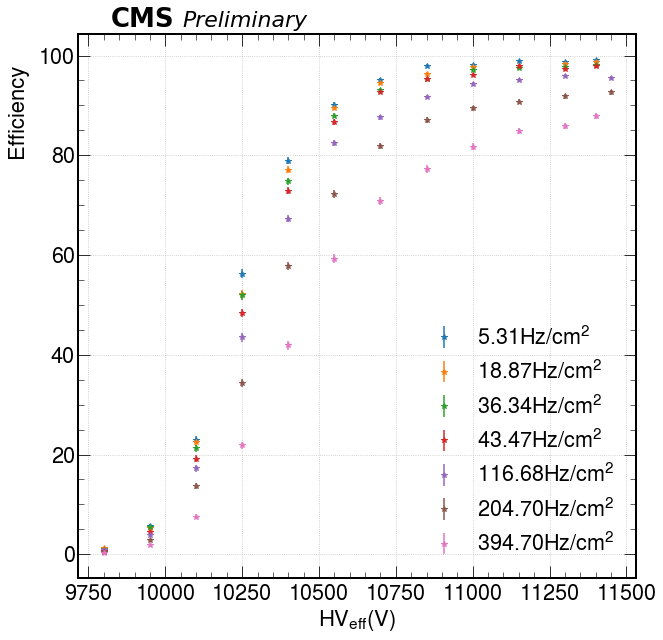

In [18]:
## Standard gas for RE1_1
file = ['data_RE1_1_004676.csv', 'data_RE1_1_004677.csv', 'data_RE1_1_004678.csv',
        'data_RE1_1_004684.csv', 'data_RE1_1_004683.csv', 'data_RE1_1_004682.csv',
        'data_RE1_1_004685.csv']
legend = [r'$5.31 Hz/cm^2$', r'$18.87 Hz/cm^2$', r'$36.34 Hz/cm^2$', r'$43.47 Hz/cm^2$',
          r'$116.68 Hz/cm^2$', r'$204.70 Hz/cm^2$', r'$394.70 Hz/cm^2$']
chamber_hv = 'hveff_RE1_1_001-TN'

plot_eff(file, legend, chamber_hv)

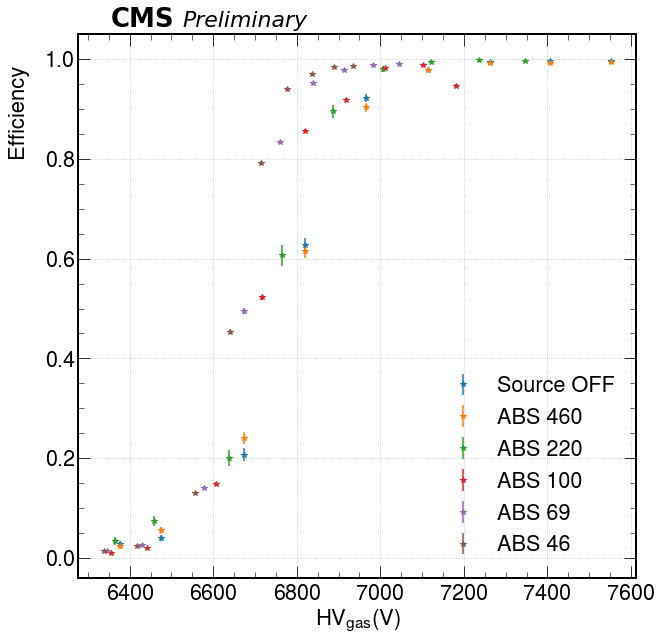

In [12]:
##  File with the data
file = ['source_off.csv', 'abs_460.csv', 'abs_220.csv', 'abs_100.csv',
       'abs_69.csv', 'abs_46.csv']
legend = ['Source OFF','ABS 460', 'ABS 220', 'ABS 100', 'ABS 69', 'ABS 46']
        
plot_eff_corr(file, legend)

In [14]:
##  File with the data - ECOMIX2
file = ['source_off_ecomix2.csv','abs_10_ecomix2.csv' ,'abs_22_ecomix2.csv', 'abs_33_ecomix2.csv', 'abs_46_ecomix2.csv',
        'abs_69_ecomix2.csv', 'abs_100_ecomix2.csv', 'abs_220_ecomix2.csv', 'abs_460_ecomix2.csv']
legend = ['Source OFF','ABS 10' ,'ABS 22', 'ABS 33', 'ABS 46', 'ABS 69',
          'ABS 100', 'ABS 220','ABS 460']
        
plot_eff(file, legend)

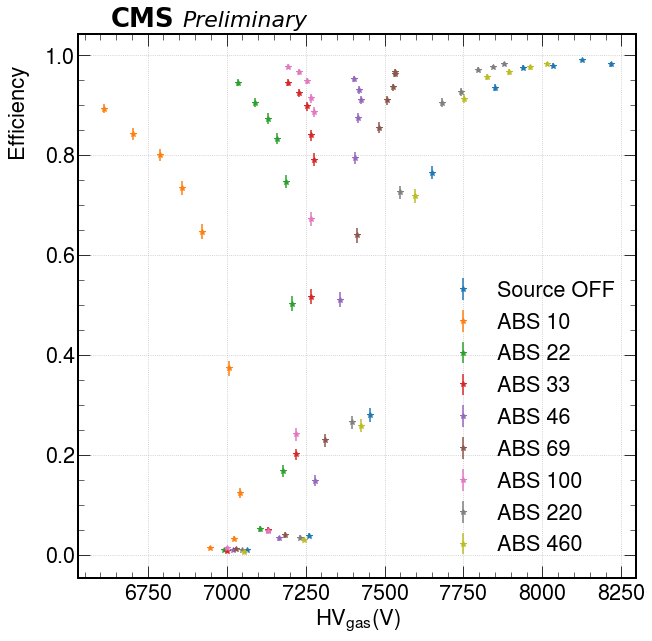

In [16]:
##  File with the data - ECOMIX2
file = ['source_off_ecomix2.csv','abs_10_ecomix2.csv' ,'abs_22_ecomix2.csv', 'abs_33_ecomix2.csv', 'abs_46_ecomix2.csv',
        'abs_69_ecomix2.csv', 'abs_100_ecomix2.csv', 'abs_220_ecomix2.csv', 'abs_460_ecomix2.csv']
legend = ['Source OFF','ABS 10' ,'ABS 22', 'ABS 33', 'ABS 46', 'ABS 69',
          'ABS 100', 'ABS 220','ABS 460']
        
plot_eff_corr(file, legend)

In [21]:
# For 2.2
file = ['abs_2.2.csv']
legend = ['2.2']
plot_eff_corr(file, legend)

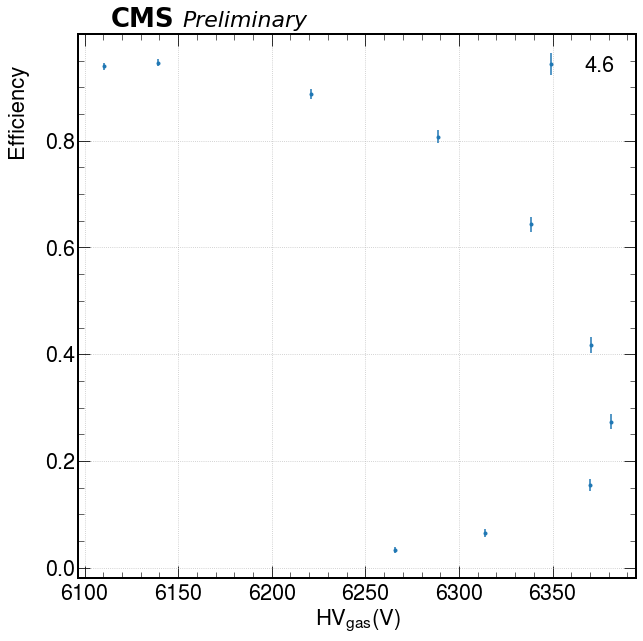

In [22]:
# For 4.6
file = ['abs_4.6.csv']
legend = ['4.6']
plot_eff_corr(file, legend)

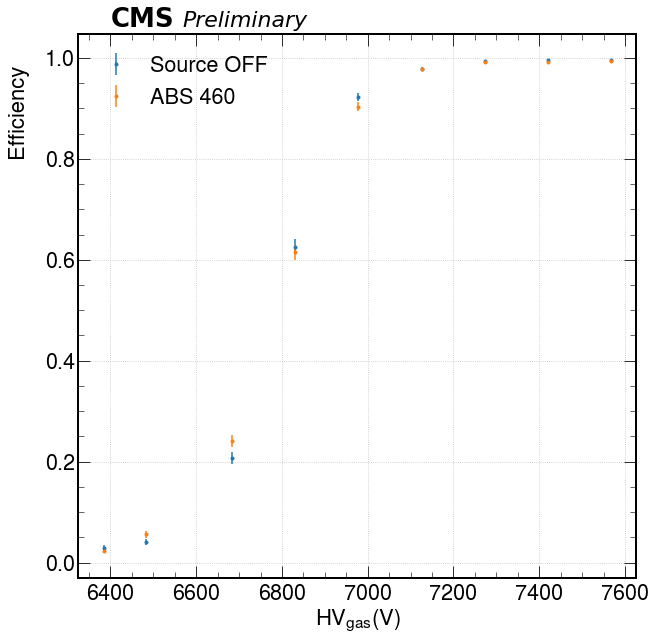